## Problem 1

251


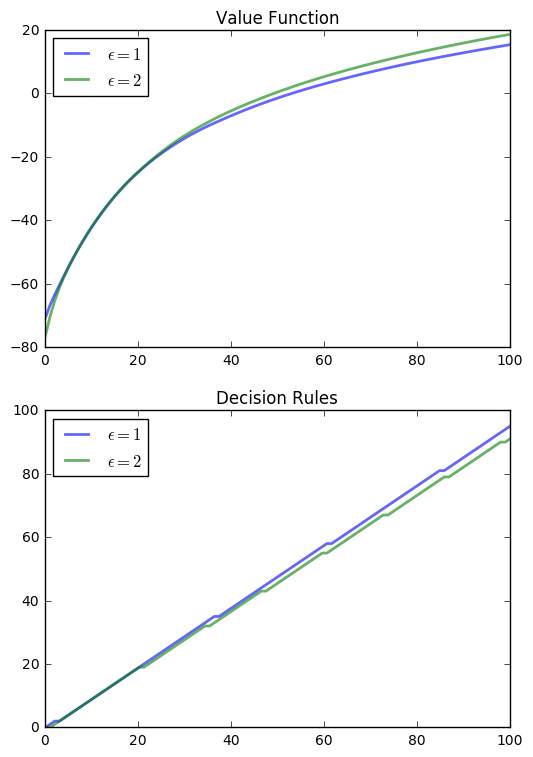

Time elapsed:  1.9961142539978027


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

beta = 0.95
num_points = 100
tol = 10**(-5)

w_vec = np.reshape(np.linspace(0.1,100,num_points),num_points)
wprime = w_vec-0.05
value_old = np.ones([num_points,2])
value_new = np.zeros([num_points,2])
policy = np.zeros([num_points,2])
ctr = 0

trans_mat = np.array([[0.9,0.1],[0.4,0.6]])
epsilon = np.array([1,2])

while(np.max(np.abs(value_old-value_new)) > tol):
    np.copyto(value_old,value_new)
    for ii in np.arange(num_points):
        for jj in np.arange(np.shape(trans_mat)[0]):
            value_new[ii,jj] = np.max(epsilon[jj]*np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+beta*np.dot(value_old[wprime<=w_vec[ii],:],trans_mat[jj,:]))
            policy[ii,jj] = np.argmax(epsilon[jj]*np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+beta*np.dot(value_old[wprime<=w_vec[ii],:],trans_mat[jj,:]))
    ctr = ctr+1

print(ctr)

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,9))
for ii in np.arange(np.shape(trans_mat)[0]):
    ax[0].plot(w_vec,value_new[:,ii],label='$\epsilon={}$'.format(epsilon[ii]),linewidth=2,alpha=0.6)
    ax[1].plot(w_vec,policy[:,ii],label='$\epsilon={}$'.format(epsilon[ii]),linewidth=2,alpha=0.6)
ax[0].set_title('Value Function')
ax[0].legend(loc='best')

ax[1].set_title('Decision Rules')
ax[1].legend(loc='best')
plt.show()
end = time.time()
print('Time elapsed: ', end-start)

## Problem 2
1.The recursive formulation can be stated as :
$$V_i(k_{it})=\max_{k_{i,t+1}}\{d_{it}+\beta V_i(k_{i,t+1})\}$$
If we define $f(k_{it})=\pi_{it}+(1-\delta)k_{it}=z_{it}k_{it}^{\theta}+(1-\delta)k_{it}$, we can rewrite the formulation:
$$V(k)=\max_{k'}\{f(k)-k'+\beta V(k')\}$$
For simplicity, all the subscripts are left out.

2.Solve the nonstochastic version of the problem above where the firm receives $z_{l}=1$ forever

168


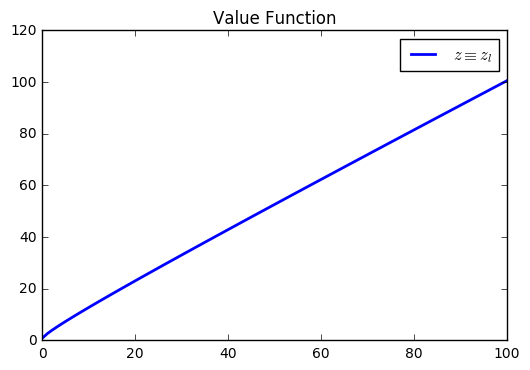

Time elapsed:  0.3960227966308594


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

beta = 0.95
theta = 0.5
delta = 0.1
num_points = 100
tol = 10**(-5)

z = 1

k_vec = np.reshape(np.linspace(0.1,100,num_points),num_points)
fk = z*k_vec**theta+(1-delta)*k_vec
kprime = fk-0.05
value_old = np.ones(num_points)
value_new = np.zeros(num_points)
policy = np.zeros(num_points)
ctr = 0


while(np.max(np.abs(value_old-value_new)) > tol):
    np.copyto(value_old,value_new)
    for ii in np.arange(num_points):
        value_new[ii] = np.max(fk[ii]-kprime[kprime<=fk[ii]]+beta*value_old[kprime<=fk[ii]])
        policy[ii] = np.argmax(fk[ii]-kprime[kprime<=fk[ii]]+beta*value_old[kprime<=fk[ii]])

    ctr = ctr+1

print(ctr)

fig,ax = plt.subplots()
ax.plot(k_vec, value_new,linewidth=2,label='$z\equiv z_l$')
ax.set_title('Value Function')
ax.legend()
plt.show()
end = time.time()
print('Time elapsed: ', end-start)

3.Solve the problem as stated above and plot the value function over $K$ for each element of $Z$.     
 The recursive function can be rewritten as:
$$V(k)=\max_{k'}\{f(k)-k'+\beta \text{E}_{z' \mid z}V(k')\}$$

250


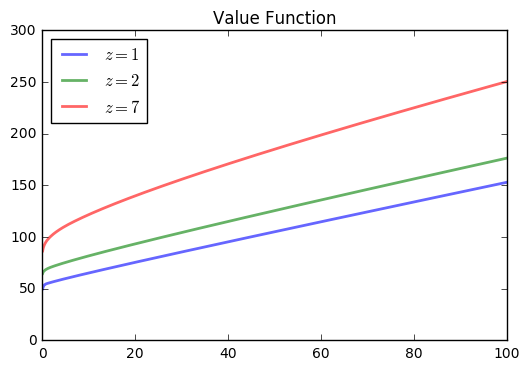

Time elapsed:  39.58126378059387


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

beta = 0.95
theta = 0.5
delta = 0.1
num_points = 1000
tol = 10**(-5)

k_vec = np.reshape(np.linspace(0.1,100,num_points),num_points)
f = lambda k,z,theta,delta:z*k**theta+(1-delta)*k

trans_mat = np.array([[0.9,0.05,0.05],[0.15,0.7,0.15],[0.1,0.1,0.8]])
z = np.array([1,2,7])

N = np.shape(trans_mat)[0]
value_old = np.ones([num_points,N])
value_new = np.zeros([num_points,N])
policy = np.zeros([num_points,N])
ctr = 0

fk = np.zeros([num_points,N])
for ii in range(N):
    fk[:,ii] = f(k_vec,z[ii],theta,delta)
kprime = np.linspace(np.min(fk),np.max(fk),num_points)-0.05

while(np.max(np.abs(value_old-value_new)) > tol):
    np.copyto(value_old,value_new)
    for ii in np.arange(num_points):
        for jj in np.arange(N):
            value_new[ii,jj] = np.max(fk[ii,jj]-kprime[kprime<=fk[ii,jj]]+beta*np.dot(value_old[kprime<=fk[ii,jj],:],trans_mat[jj,:]))
            policy[ii,jj] = np.argmax(fk[ii,jj]-kprime[kprime<=fk[ii,jj]]+beta*np.dot(value_old[kprime<=fk[ii,jj],:],trans_mat[jj,:]))
    ctr = ctr+1

print(ctr)

fig,ax = plt.subplots()
for ii in np.arange(N):
    ax.plot(k_vec,value_new[:,ii],label='$z={}$'.format(z[ii]),linewidth=2,alpha=0.6)
ax.set_title('Value Function')
ax.legend(loc='best')
plt.show()
end = time.time()
print('Time elapsed: ', end-start)

4.Plot the decision rules

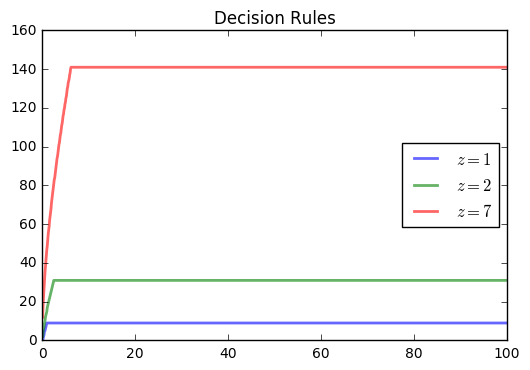

In [64]:
fig,ax = plt.subplots()
for ii in np.arange(N):
    ax.plot(k_vec,policy[:,ii],label='$z={}$'.format(z[ii]),linewidth=2,alpha=0.6)
ax.set_title('Decision Rules')
ax.legend(loc='best')
plt.show()

Question 4&5 will be solved in the following days

To be continued